# Introduction to Linear Regression



In [2]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries required
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import numpy as np

In [3]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", index_col=0)
house_data

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790.0
1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908.0
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
6,"1440 N Wood St #2F, Chicago IL",Wicker Park,Condo,242500,NaN,5.38,9,3.22,0,0,0,69.4,196667.5
7,"1137 N Wood St #F2, Chicago IL",Wicker Park,Condo,477500,NaN,4.18,8,3.39,0,0,0,59.5,445030.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0


In [5]:
# Summarise the data
house_data.describe()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,2.190000e+02,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,4.834311e+05,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,4.862191e+05
std,4.001249e+05,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,3.978582e+05
min,2.450000e+04,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,2.883650e+04
25%,3.190000e+05,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,3.074488e+05
50%,3.900000e+05,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,3.919800e+05
75%,5.125000e+05,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,5.324750e+05
max,3.686000e+06,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3.973508e+06


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 13 columns):
Address           219 non-null object
Neighborhood      219 non-null object
HouseType         216 non-null object
Price             219 non-null int64
Bath              70 non-null float64
CrimeIndex        219 non-null float64
MinutesToLoop     219 non-null int64
MilesToLake       219 non-null float64
Age               219 non-null int64
LotSizeSqft       219 non-null int64
HouseSizeSqft     219 non-null int64
SchoolIndex       219 non-null float64
EstimatedPrice    219 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 24.0+ KB


In [7]:
# Look for any linear correlations in the data - the bigger the number the better ordinary least squares will do
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117e51dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d993950>]], dtype=object)

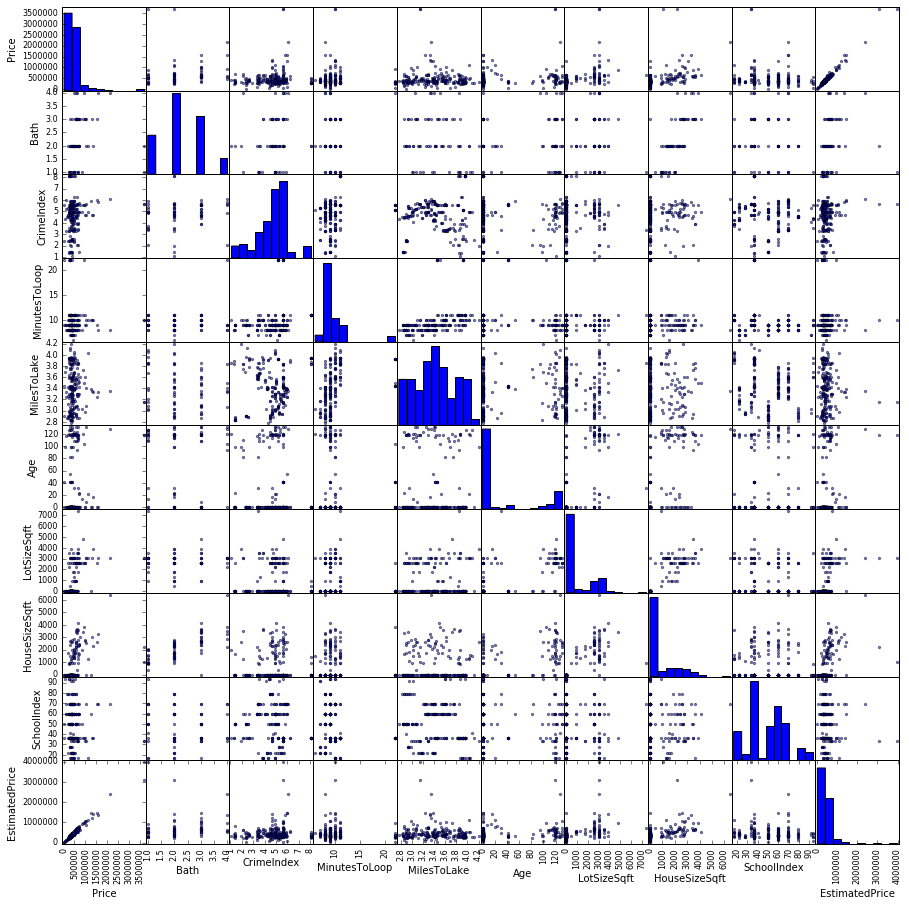

In [8]:
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [10]:
# create a dataframe with just the estimated price column in it
y = house_data.EstimatedPrice

In [11]:
# create a RANSAC regressor
ransac = sklearn.linear_model.RANSACRegressor()

In [12]:
# use the RANSAC regressor to find how much of the Price is related to the EstimatedPrice  
x = house_data[['EstimatedPrice']]
y = house_data.Price

In [13]:
ransac.fit(x, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [14]:
ransac.estimator_.coef_

array([ 0.9018784])

In [15]:
# use that regression to predict Price based on EstimatedPrice
ransac.predict([335790.0])

/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 336776.12336919])

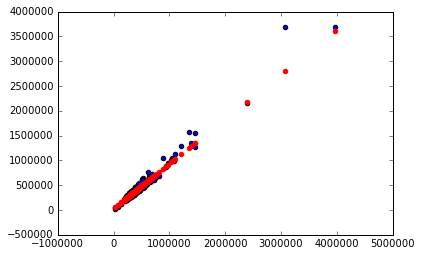

In [16]:
# draw a scatter plot of Price / EstimatedPrice and overlay the RANSAC prediction on it

prediction = ransac.predict(house_data[['EstimatedPrice']])

plt.scatter(x, y)
plt.scatter(x, prediction, color='red')

In [17]:
# RANSAC has an attribute called 'estimator'. What type is it?

print type(ransac.estimator_)

<class 'sklearn.linear_model.base.LinearRegression'>


In [18]:
# What is the coefficient (gradient) and y-intercept as reported by this estimator (hint: coef_ and intercept_)
ransac.estimator_.coef_

array([ 0.9018784])

In [19]:
ransac.estimator_.intercept_

33934.374553367088

In [20]:
# Create a new data frame with two columns: HouseSizeSqft and Bath

import numpy as np

newdf = pd.DataFrame(data=house_data, columns=['HouseSizeSqft' , 'Bath', 'Price'])


In [21]:
np.isnan(newdf.Bath).value_counts()

True     149
False     70
Name: Bath, dtype: int64

In [22]:
clean_newdf = newdf[newdf.HouseSizeSqft > 0]

In [23]:
# Regress Price against these values

x = clean_newdf[['HouseSizeSqft', 'Bath']] 
y = clean_newdf.Price
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [24]:
# What would you expect a house price to be for a house with 3 bathrooms and 3500 sqft?
ransac.predict([[3500,3]])

array([ 611625.15268047])

In [56]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [52]:
# Re the 3D option challenge at the bottom:

#fig = plt.figure()
#ax = p3.Axes3D(fig)

Axes3D.

ax = fig.add_subplot(111, projection='3d')
ax.scatter(clean_newdf.Bath, clean_newdf.HouseSizeSqft, clean_newdf.Price, c='r', s=30)

#line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
#                                   interval=50, blit=False)

plt.show()


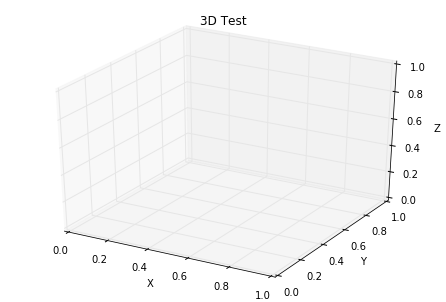

In [47]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

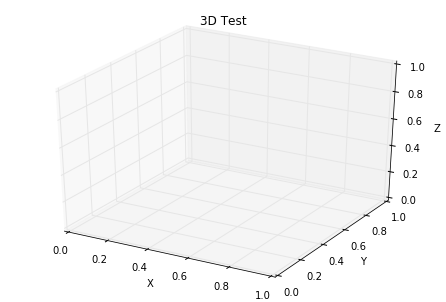

In [47]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [145]:
# Can you find any houses in the data set which are similar to this?
select_house = house_data[(house_data.HouseSizeSqft >= 3500) & (house_data.Bath >= 3) & (house_data.Price >= 650000)]
select_house

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0
39,"1456 N Milwaukee Ave, Chicago IL",Wicker Park,Multi-Family Home,2150000,4.0,6.09,8,3.35,128,3049,6422,69.4,2386500.0
84,"2045 W Saint Paul Ave, Chicago IL",Wicker Park,Single-Family Home,949000,4.0,5.58,22,3.50,104,2614,3858,36.1,972725.0


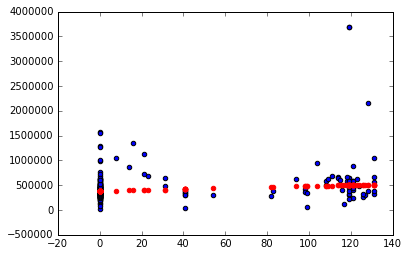

In [167]:
# Try selecting different variables or combinations of variables or another regressor.
theilsen = sklearn.linear_model.TheilSenRegressor()

x = house_data[['Age']]
y = house_data.Price

theilsen.fit(x,y)

prediction = theilsen.predict(house_data[['Age']])

plt.scatter(x, y)
plt.scatter(x, prediction, color='red')


In [160]:
over_60 = house_data[house_data.Age.between(1,60)]
over_60

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
32,"1357 N Bell Ave, Chicago IL",Wicker Park,Single-Family Home,1125000,2.0,4.93,10,4.03,21,3049,1290,16.7,1105875.0
81,"2012 W Saint Paul Ave #145, Chicago IL",Wicker Park,Condo,32000,NaN,5.58,22,3.45,41,0,0,36.1,30208.0
86,"2012 W Saint Paul Ave #208, Chicago IL",Wicker Park,Condo,310000,NaN,5.58,22,3.45,41,0,0,36.1,358980.0
92,"1500 N Paulina St, Chicago IL",Wicker Park,Single-Family Home,870000,1.0,4.93,8,3.03,14,2614,1996,50.0,936120.0
101,"1236 N Hoyne Ave, Chicago IL",Wicker Park,Single-Family Home,650000,1.0,3.39,11,3.85,31,7405,900,69.4,737750.0
126,"2012 W Saint Paul Ave #410, Chicago IL",Wicker Park,Condo,385000,NaN,5.58,22,3.45,41,0,0,36.1,456995.0
135,"1924 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,1357000,2.0,4.65,10,3.33,16,3920,2311,36.1,1394996.0
159,"1728 N Damen Ave #304, Chicago IL",Wicker Park,Condo,334000,NaN,5.65,9,3.42,41,0,0,36.1,280560.0


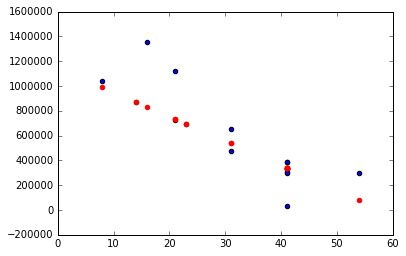

In [164]:
x = over_60[['Age']]
y = over_60.Price

theilsen.fit(x,y)

prediction = theilsen.predict(over_60[['Age']])

plt.scatter(x, y)
plt.scatter(x, prediction, color='red')

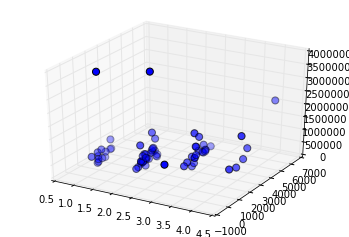

In [68]:
#(Optional) Can you make a 3D plot to show whether they are effective?

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(house_data.Bath, house_data.HouseSizeSqft, house_data.Price, s=50)


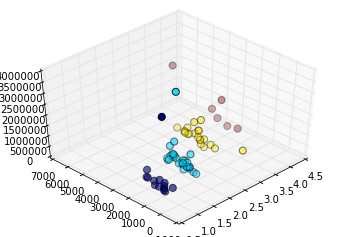

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

def normalised_bath_color(x):
    return x /4.0
ax.scatter(house_data.Bath, 
           house_data.HouseSizeSqft, 
           house_data.Price, 
           s=50,
           c = house_data.Bath.map(normalised_bath_color)
          )
ax.view_init(45,225)
plt.show()

In [17]:
import sklearn.linear_model
import sklearn.dummy
house_data.dropna(inplace=True)

In [18]:
#Bath              70 non-null float64
#CrimeIndex        219 non-null float64

In [19]:
x = house_data[['Bath']]
y = house_data.CrimeIndex

In [20]:
d = sklearn.dummy.DummyRegressor()

In [21]:
d.fit(x,y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [27]:
d_pred = d.predict(x)

In [26]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(x,y)
ts_pred = ts.predict(x)

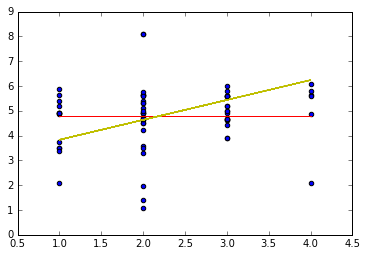

In [28]:
plt.scatter(x,y)
plt.plot(x,d_pred, 'r')
plt.plot(x,ts_pred, 'y')

In [30]:
print ts.coef_

[ 0.80227676]
